In [22]:
import pandas as pd

df = pd.read_csv('german_credit_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [33]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [34]:
duplicate_count = df.duplicated().sum()
null_values = df.isnull().sum()

duplicate_count, null_values


(0,
 Age                   0
 Sex                   0
 Job                   0
 Housing               0
 Saving accounts     183
 Checking account    394
 Credit amount         0
 Duration              0
 Purpose               0
 Risk                  0
 dtype: int64)

In [35]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


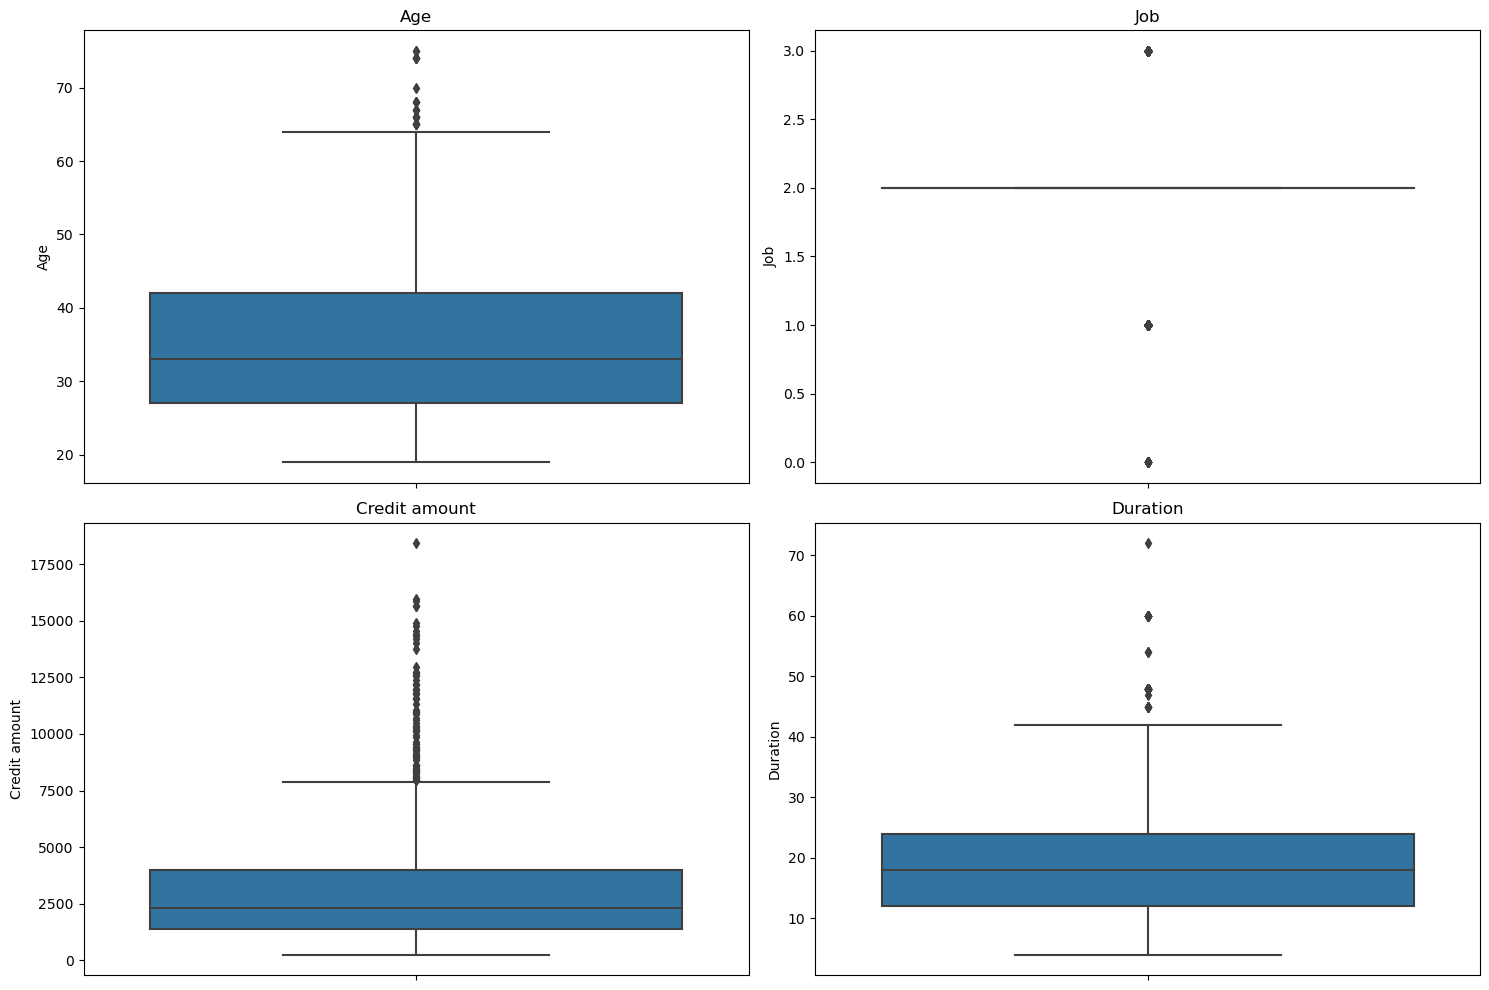

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#only numerical columns
nc = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(nc):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [28]:
# categorical columns
cc = df.select_dtypes(include=['object']).columns
df[cc].describe()







,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [41]:
# only numerical columns 
cm = df[nc].corr() #correlation matrix
cm




,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


The Age variable has no significant correlation with any of the other numerical variables, as indicated by the values close to zero.The most substantial correlation observed is between Credit amount and Duration, with a coefficient of approximately 0.624984, suggesting a moderate to strong positive relationship.

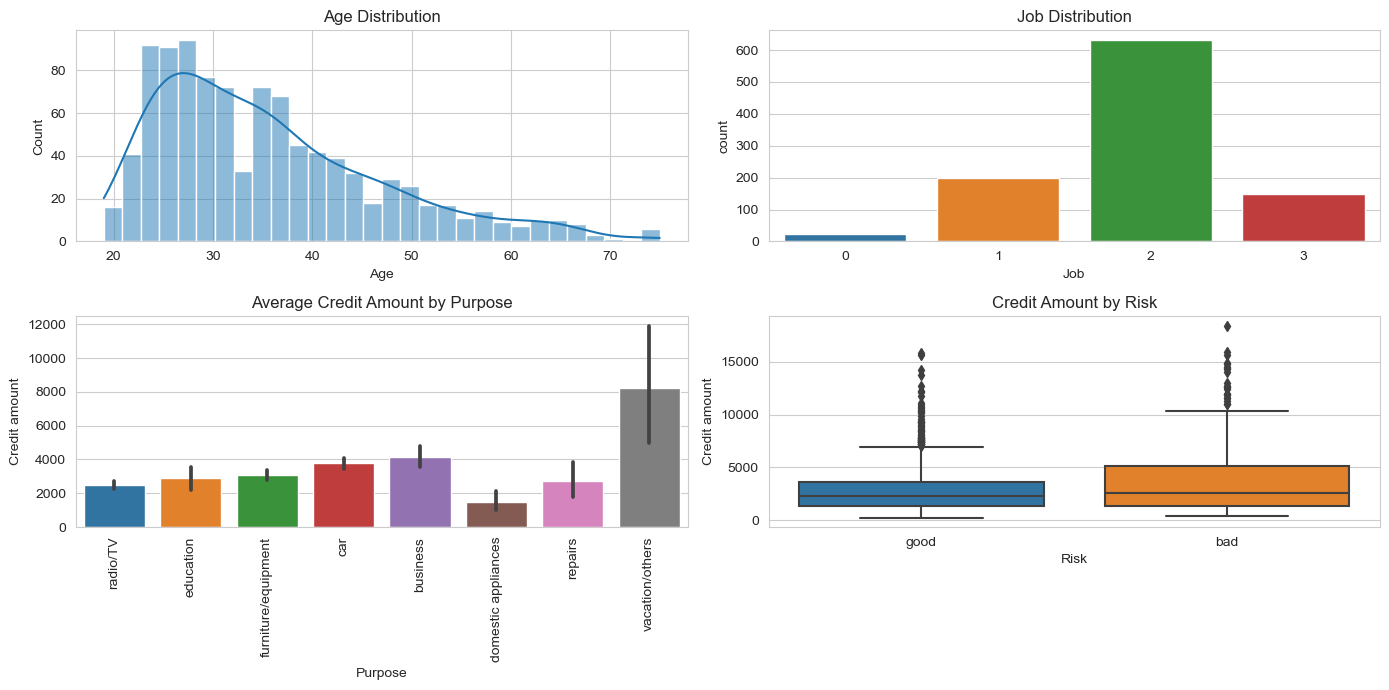

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Job', data=df)
plt.title('Job Distribution')

plt.subplot(2, 2, 3)
sns.barplot(y='Credit amount', x='Purpose', data=df)
plt.xticks(rotation=90)
plt.title('Average Credit Amount by Purpose')

plt.subplot(2, 2, 4)
sns.boxplot(x='Risk', y='Credit amount', data=df)
plt.title('Credit Amount by Risk')

plt.tight_layout()
plt.show()


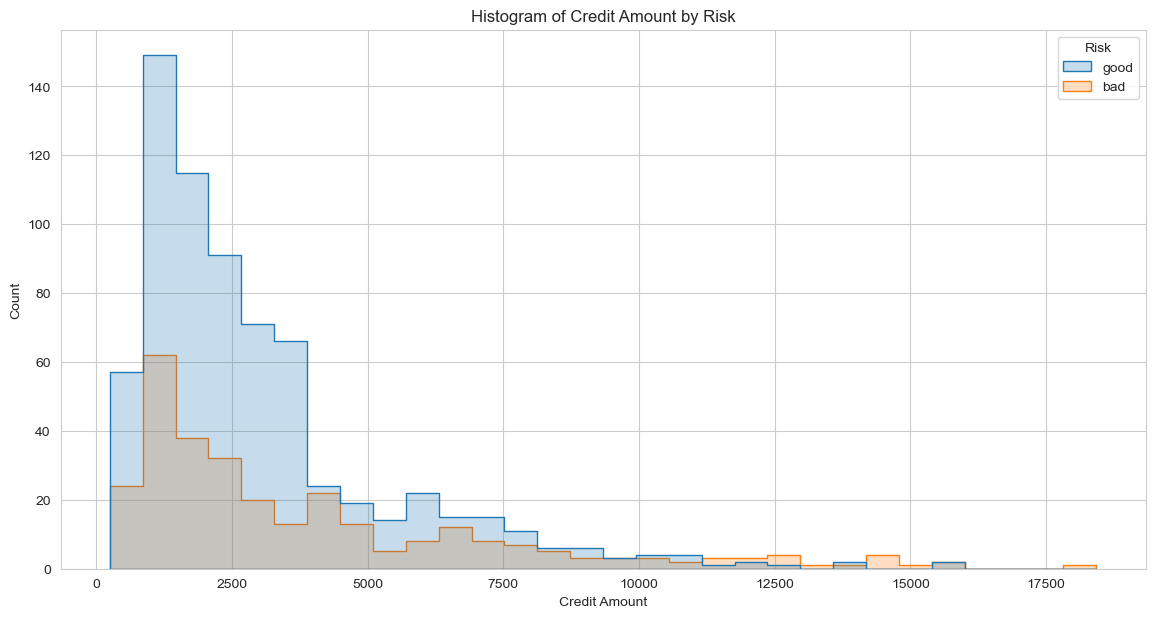

In [49]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='Credit amount', hue='Risk', element='step', bins=30)
plt.title('Histogram of Credit Amount by Risk')
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.show()


There is a noticeable concentration of loans in the lower end of the spectrum for both risk categories, suggesting smaller loans are more common. Also,there is a substantial overlap in credit amounts between 'good' and 'bad' risk categories, 'bad' risk loans appear more frequently at higher loan amounts, suggesting a potential association between larger loans and increased risk. 

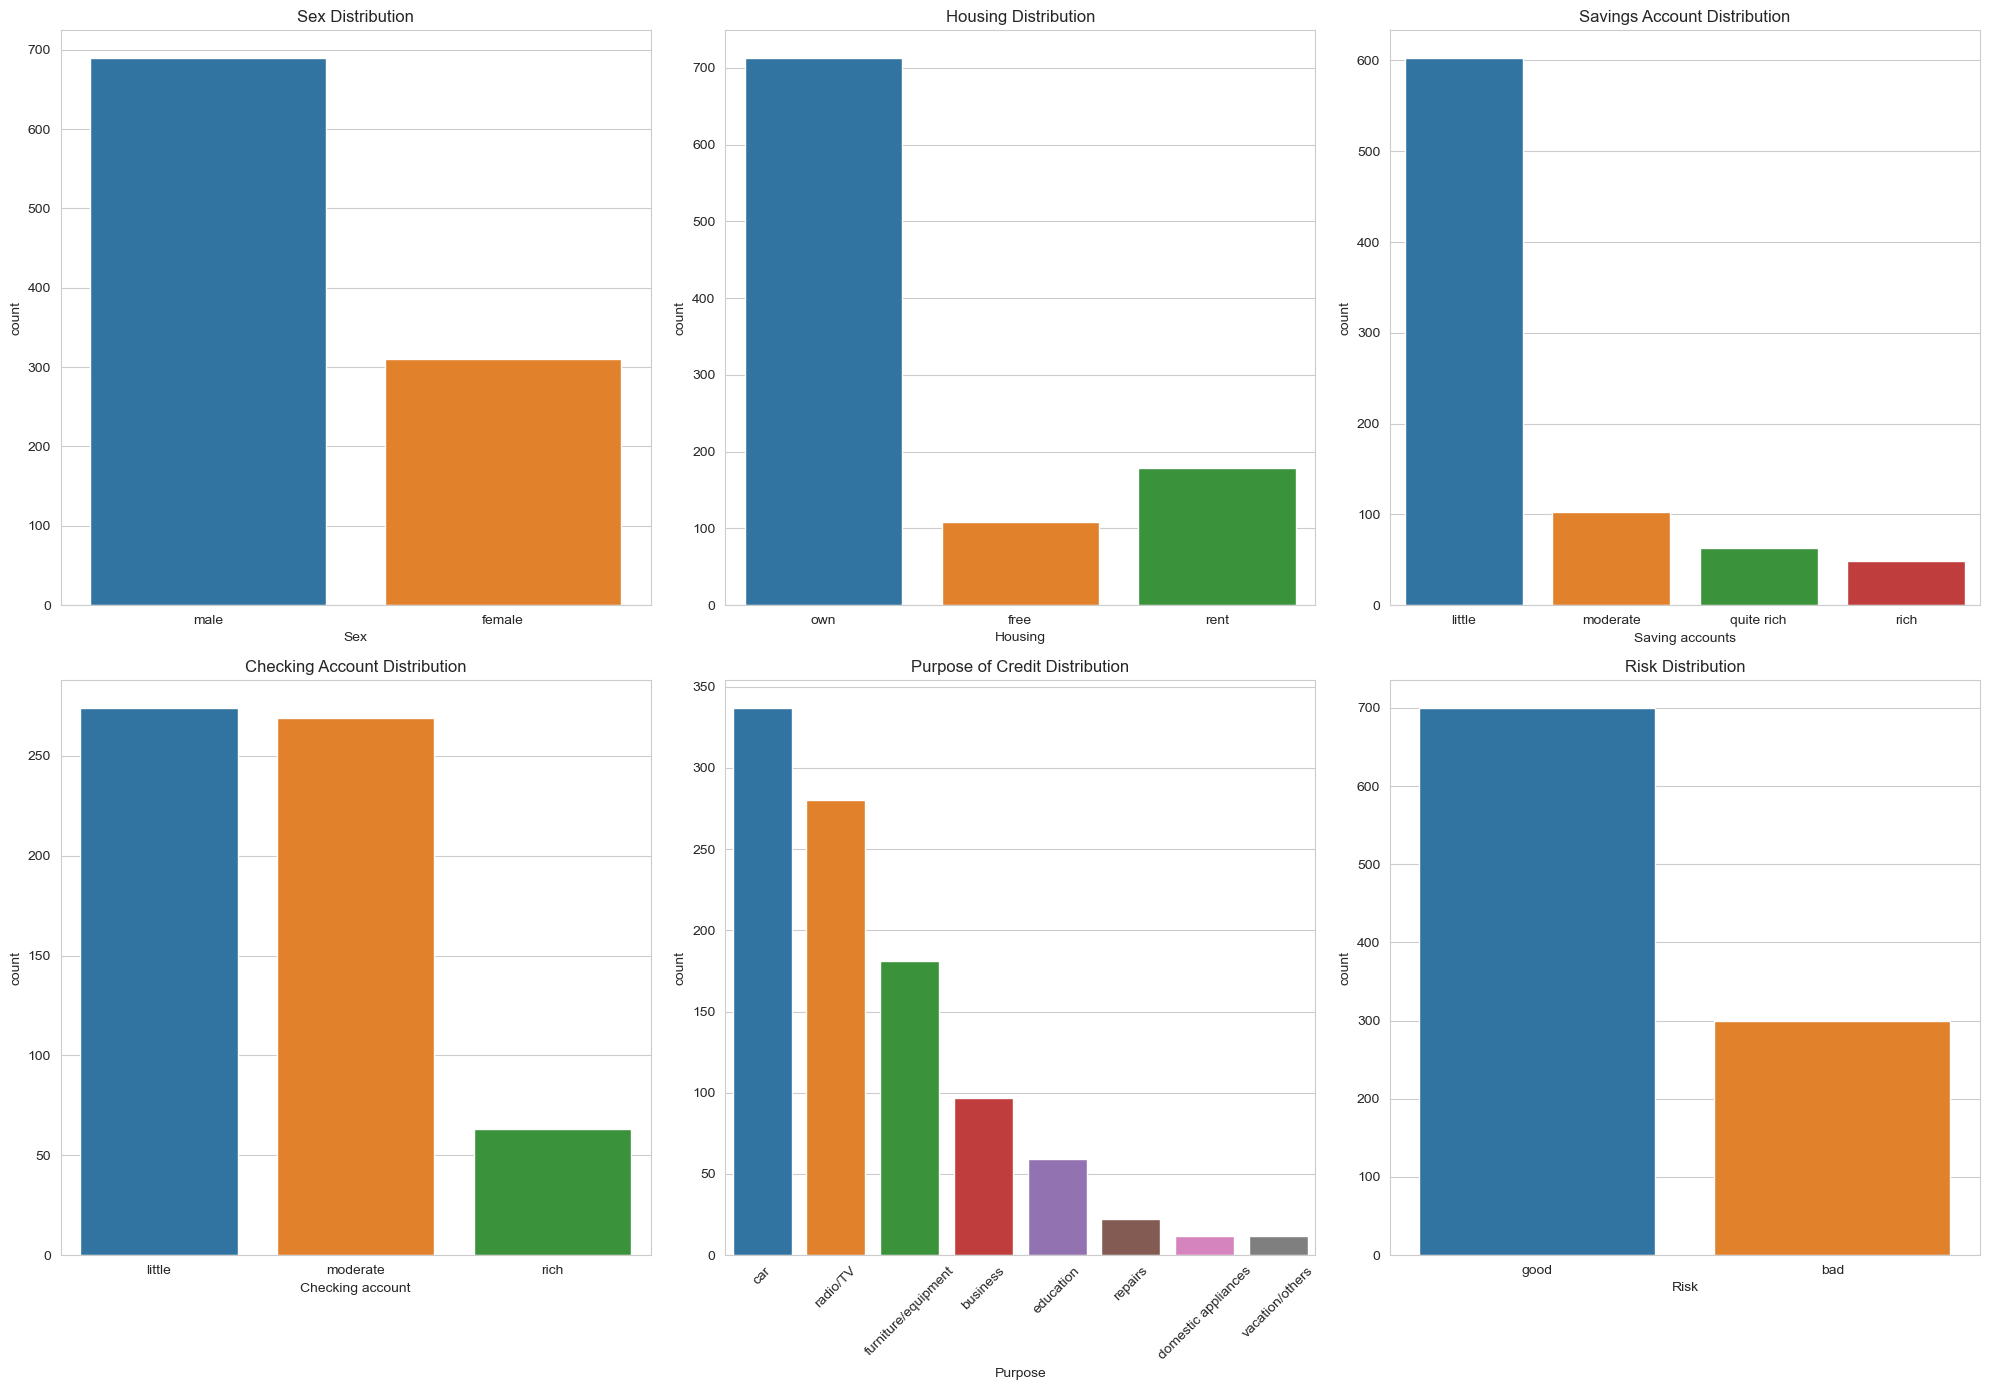

In [48]:

plt.figure(figsize=(20, 14))

plt.subplot(2, 3, 1)
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Housing', data=df)
plt.title('Housing Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Saving accounts', data=df, order=df['Saving accounts'].value_counts().index)
plt.title('Savings Account Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Checking account', data=df, order=df['Checking account'].value_counts().index)
plt.title('Checking Account Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Purpose', data=df, order=df['Purpose'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Purpose of Credit Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='Risk', data=df)
plt.title('Risk Distribution')

plt.tight_layout()
plt.show()


The categorical analysis of the dataset reveals a gender imbalance with a higher number of male credit applicants, a trend towards homeownership with most individuals owning their homes, and a financial profile skewed towards less savings, as the majority report 'little' savings and checking account balances. Credit is most commonly sought for purchasing cars and electronics like radios and TVs, suggesting a focus on durable goods acquisition over immediate or luxury expenditures.  These insights suggest a demographic of male, property-owning borrowers who seek credit for significant but relatively standard consumer purchases and are generally considered to be low-risk by lenders.

In [59]:
# Ratio Features
df['Credit_to_Duration'] = df['Credit amount'] / df['Duration']
df['Credit_to_Duration']

0      194.833333
1      123.979167
2      174.666667
3      187.666667
4      202.916667
          ...    
995    144.666667
996    128.566667
997     67.000000
998     41.000000
999    101.688889
Name: Credit_to_Duration, Length: 1000, dtype: float64

From a risk  perspective, loans with a high credit-to-duration ratio might be riskier, as they could be harder for borrowers to repay in a shorter timeframe.

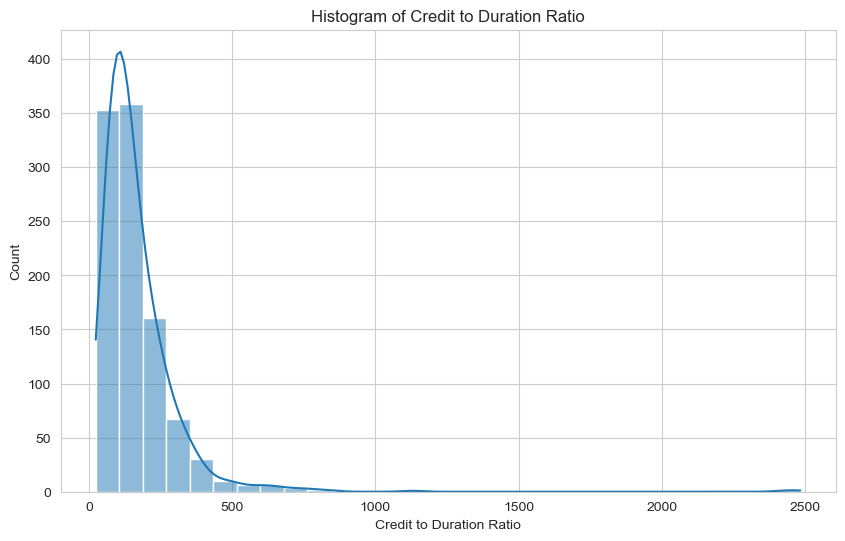

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_to_Duration'], bins=30, kde=True)
plt.title('Histogram of Credit to Duration Ratio')
plt.xlabel('Credit to Duration Ratio')
plt.ylabel('Count')
plt.show()


The histogram of the Credit to Duration Ratio shows a distribution that is heavily skewed to the right, indicating that most loans have a low credit to duration ratio. The peak of the distribution occurs close to zero, suggesting that the majority of loans in the dataset have a small ratio of credit amount to the duration of the loan. 